In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston["feature_names"])
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston["feature_names"])

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=150, random_state=100)
X_train_tsne = tsne.fit_transform(X_train_scaled)

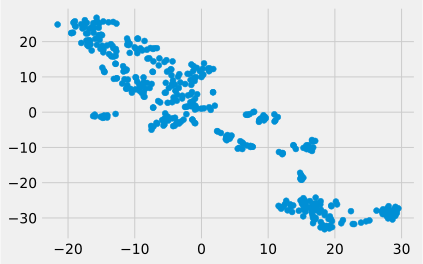

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()


## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

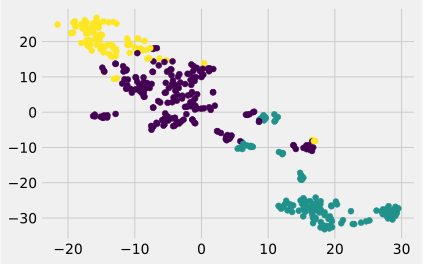

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [10]:
for i in range(3):
    print(f"Mean_price[Class_{i}] = {y_train[labels_train == i].mean():.2f}")

Mean_price[Class_0] = 24.96
Mean_price[Class_1] = 16.17
Mean_price[Class_2] = 27.79


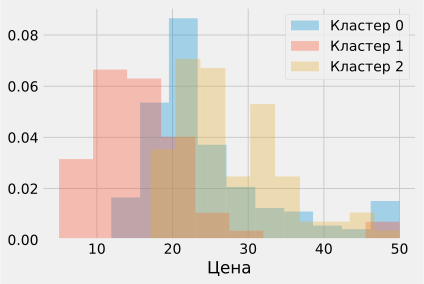

In [11]:
plt.hist(y_train[labels_train == 0], bins=10, density=True, alpha=0.33)
plt.hist(y_train[labels_train == 1], bins=10, density=True, alpha=0.33)
plt.hist(y_train[labels_train == 2], bins=10, density=True, alpha=0.33)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

In [12]:
for i in range(3):
    print(f"Mean_CRIM[Class_{i}] = {X_train.loc[labels_train == i, 'CRIM'].mean():.2f}")

Mean_CRIM[Class_0] = 0.42
Mean_CRIM[Class_1] = 10.80
Mean_CRIM[Class_2] = 0.07


## Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [13]:
labels_test = kmeans.predict(X_test_scaled)

In [14]:
for i in range(3):
    print(f"Mean_price[Class_{i}] = {y_test[labels_test == i].mean():.2f}")

Mean_price[Class_0] = 21.86
Mean_price[Class_1] = 16.44
Mean_price[Class_2] = 31.35


In [15]:
for i in range(3):
    print(f"Mean_CRIM[Class_{i}] = {X_test.loc[labels_test == i, 'CRIM'].mean():.2f}")

Mean_CRIM[Class_0] = 0.27
Mean_CRIM[Class_1] = 10.17
Mean_CRIM[Class_2] = 0.06


## Задание 4
Обучите любую модель регрессии на этом же датасете. Добавьте новый признак - метка кластера, которую вы уже получили применив модель кластеризации к этим данным. Сравнить качество без метки кластера и с ней по отложенной выборке.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_test_pred = lr.predict(X_test_scaled)
r2_score(y_test, y_test_pred)

0.668759493535632

In [17]:
X_train_cluster = X_train_scaled.copy()
X_test_cluster = X_test_scaled.copy()
X_train_cluster['class'] = labels_train
X_test_cluster['class'] = labels_test

lr = LinearRegression()
lr.fit(X_train_cluster, y_train)
y_test_pred = lr.predict(X_test_cluster)
r2_score(y_test, y_test_pred)

0.6688794358164192

In [18]:
for i in range(3):
    lr = LinearRegression()
    lr.fit(X_train_scaled.loc[labels_train == i], y_train[labels_train == i])
    exec(f'y_test_pred_{i} = lr.predict(X_test_scaled.loc[labels_test == {i}])')
    exec(f'print(r2_score(y_test[labels_test == {i}], y_test_pred_{i}))')
y_test_all = np.hstack([y_test[labels_test == 0], y_test[labels_test == 1], y_test[labels_test == 2]])
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1, y_test_pred_2])
print(f"total r2: {r2_score(y_test_all, y_test_pred_all)}")

0.721524042313201
0.5231397590833383
0.915516197205082
total r2: 0.7955104919189295


Вывод: если просто присоединить признак класса, особой точности это не дает, а с отдельным обучением для каждого класса точность выше

## Задание 5
Загрузите "wine dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные и тестовые.

Масштабируйте данные.

Постройте модель понижения размерности на тренировочный данных, визуализируйте с помощью диаграммы рассеяния, подберите оптимальные гиперпараметры, чтобы сегментов на графике было столько, сколько классов в данных.

С помощью модели кластеризации (поэкспериментируйте и с другими моделями, не только с KMeans) разбейте данные из тренировочного набора на необходимое количество кластеров.

Постройте диаграмму рассеяния на данных, полученных с помощью понижения размерности и раскрасьте точки из разных кластеров разными цветами.

Убедитесь с помощью визуализации, что разбиение данных из тестового набора получилось успешным.

Сделайте вывод, какие модели лучше себя показывают на этой задаче.


In [19]:
from sklearn.datasets import load_wine
data = load_wine()

In [20]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target)

In [21]:
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

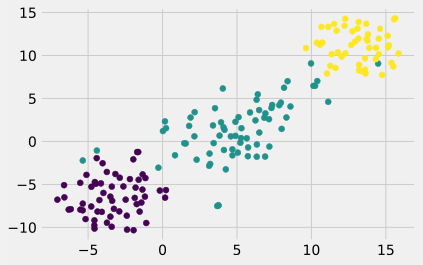

In [22]:
tsne = TSNE(n_components=2, learning_rate=150)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

plt.show()

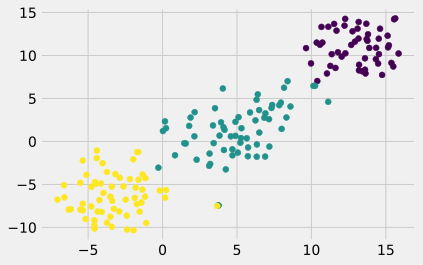

In [23]:
kmeans = KMeans(n_clusters=3, max_iter=100)
y_pred = kmeans.fit_predict(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred)

plt.show()

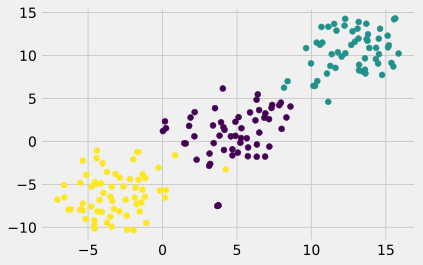

In [24]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)

y_pred = model.fit_predict(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred)

plt.show()

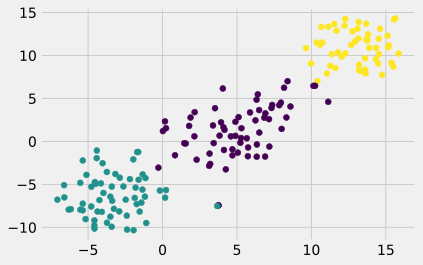

In [25]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3)

y_pred = model.fit_predict(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred)

plt.show()

Визуально Kmeans и GaussianMixture дают лучший результат

## Задание 6
Используйте "Olivetti faces data-set from AT&T" из встроенных наборов данных библиотеки sklearn.

Обучить любую модель классификации на этом датасете до применения PCA (количество компонент подберите самостоятельно) и после него. Сравнить качество классификации по отложенной выборке.


In [26]:
from sklearn.datasets import fetch_olivetti_faces

In [27]:
data = fetch_olivetti_faces()

In [28]:
print(data.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [29]:
scaler = StandardScaler()
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [30]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

Wall time: 31.6 s


0.96

In [31]:
%%time
from sklearn.decomposition import PCA
for i in range(1, 30):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    lr = LogisticRegression(solver="liblinear")
    lr.fit(X_train_pca, y_train)
    y_pred_pca = lr.predict(X_test_pca)
    print(f'components pca = {i}, acc = {accuracy_score(y_test, y_pred_pca)}')

components pca = 1, acc = 0.0
components pca = 2, acc = 0.02
components pca = 3, acc = 0.09
components pca = 4, acc = 0.16
components pca = 5, acc = 0.34
components pca = 6, acc = 0.48
components pca = 7, acc = 0.51
components pca = 8, acc = 0.63
components pca = 9, acc = 0.69
components pca = 10, acc = 0.75
components pca = 11, acc = 0.75
components pca = 12, acc = 0.77
components pca = 13, acc = 0.78
components pca = 14, acc = 0.87
components pca = 15, acc = 0.9
components pca = 16, acc = 0.92
components pca = 17, acc = 0.93
components pca = 18, acc = 0.93
components pca = 19, acc = 0.94
components pca = 20, acc = 0.94
components pca = 21, acc = 0.94
components pca = 22, acc = 0.95
components pca = 23, acc = 0.95
components pca = 24, acc = 0.95
components pca = 25, acc = 0.94
components pca = 26, acc = 0.95
components pca = 27, acc = 0.95
components pca = 28, acc = 0.95
components pca = 29, acc = 0.95
Wall time: 2.9 s


Как видно, после ~20 компонент точность особо не растет, при этом скорость выполнения кода ~25 секунд без PCA и ~0,11 секунды с PCA, т.е. при падении точности на ~3-5% мы выигрываем во времени в ~250 раз.

In [32]:
%%time
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train_pca, y_train)
y_pred_pca = lr.predict(X_test_pca)
print(f'components pca = {i}, acc = {accuracy_score(y_test, y_pred_pca)}')

components pca = 29, acc = 0.94
Wall time: 114 ms
